# Speech Siganl Processing: Final Report

1. Draw a waveform, a spectrogram of "noisy.wav", and a log-power spectrum at 1.0 second.
2. Design the FIR filters that remove two sinusoidal noises in "noisy.wav" and get clean speech, "clean_by_fir.wav", by applying the filters. If you can design one filter that remove the noises sufficiently　without distortion, it is perfect. However, it may be difficult and applying two filters in series can get the better result easily.
3. Design the IIR filters that remove two sinusoidal noises in "noisy.wav" and get clean speech, "clean_by_iir.wav", by applying the filters.
4. Discuss the advantage of the IIR filter comparing to the FIR filter.

## Submission Material
jupyter notebook file, "Final Report by [YOUR NAME].ipynb", that includes python program lines and description lines of the method using "Markdown".  

## Submission mail address
kuroiwa@faculty.chiba-u.jp

## Dead line
Feb. 12 /2019

In [1]:
import numpy as np
import scipy
import scipy.signal as ss

In [2]:
# wav functions using scipy.io.wavfile
# audio play using pyaudio package
#
# How to install pyaudio: that needs "portaudio"!!
#
# Ubuntu:
#  sudo apt-get install portaudio19-dev
#  pip install pyaudio
#
# MacOS:
#  brew update
#  brew install portaudio
#  brew link --overwrite portaudio
#  pip install pyaudio

from scipy import io
from scipy.io import wavfile
import pyaudio
import struct

def wavread(wavefile):
    fs, y = scipy.io.wavfile.read(wavefile)
    if y.dtype == 'float32' or y.dtype == 'float64' :
        max_y = 1
    elif y.dtype == 'uint8':
        y = y - 128
        max_y = 128
    elif y.dtype == 'int16':
        max_y = np.abs(np.iinfo(np.int16).min)
    else:
        max_y = np.abs(np.iinfo(np.int16).min)
    y = y / max_y
    y = y.astype(np.float32)
    return (y, fs)

def wavwrite(wavefile,data,fs):
    if data.dtype == 'float32' or data.dtype == 'float64' :
        max_y = 1
    elif data.dtype == 'uint8':
        data = y - 128
        max_y = 128
    elif data.dtype == 'int16':
        max_y = np.abs(np.iinfo(np.int16).min)        
    else:
        max_y = np.abs(np.iinfo(np.int16).min)        
    data = np.int16(data / max_y * np.abs(np.iinfo(np.int16).min))
    scipy.io.wavfile.write(wavefile, fs, data)

def audioplay(y,fs):
    yout = np.iinfo(np.int16).max/np.max(np.abs(y))*y
    yout = yout.astype(np.int16)
    yout = struct.pack("h" * len(yout), *yout) 
    length = len(yout)
    
    p = pyaudio.PyAudio() 
    stream = p.open(format=pyaudio.paInt16, channels=1, rate=fs, output=True)
    chunk = 1024
    sp = 0  # 再生位置ポインタ
    buffer = yout[sp:sp+chunk]
    while len(buffer) > 0:
        stream.write(buffer)
        sp = sp + chunk
        buffer = yout[sp:sp+chunk]
            
    stream.stop_stream()
    stream.close()

    p.terminate()

sampling frequecy: 16000


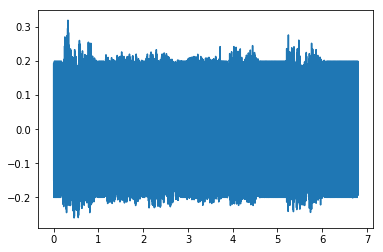

In [3]:
# Test
import matplotlib.pyplot as plt
%matplotlib inline

y,fs = wavread("noisy.wav")
t = np.arange(0,y.shape[0]/fs,1/fs)
print("sampling frequecy:",fs)
audioplay(y,fs)
plt.plot(t,y)

In [4]:
# quick play
audioplay(y,fs*2)

In [5]:
# Reverse the signail and write wavfile
rev = y[::-1]
audioplay(rev,fs)
wavwrite("reverse.wav", rev, fs)

# 1. Spectrogram and Spectrum

In [6]:
import scipy


# 2. FIR filter

In [7]:
import scipy.signal as ss
b = np.array([1,-0.97])
#out = ss.convolve(b,y)
out = ss.lfilter(b, [1.0], y)
audioplay(out,fs)

## 3. IIR filter

# Appendix

## A. Low-pass filter (FIR filter design using the window method)

(-399.21875, 8383.59375, -49.13217745135606, 2.339627497683622)

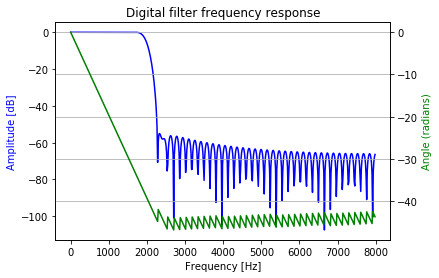

In [8]:
# from scipy import signal
numtaps = 101
f = 2000/(0.5*fs)  # cutoff 0.1 * fs/2 
b = ss.firwin(numtaps, f)
#out = ss.convolve(b, y)
out = ss.lfilter(b, [1.0], y)
audioplay(out,fs)


# plot frequency response of FIR filter b
w, h = ss.freqz(b)
freq = w * fs / (2*np.pi) 

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(freq, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
#ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_xlabel('Frequency [Hz]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(freq, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
#plt.show()

## B. High-pass filter (FIR filter design using the window method)

(-399.21875, 8383.59375, -85.67896292656461, 9.016739071191797)

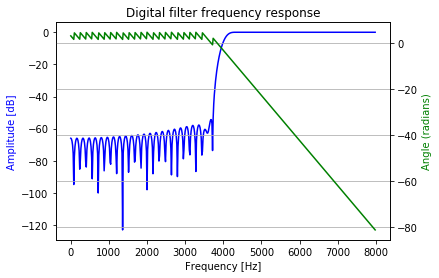

In [9]:
# Filter design
numtaps = 101
f = 4000/(0.5*fs)  # cutoff 0.1 * fs/2 

b = ss.firwin(numtaps, f, pass_zero=False)

# Apply the filter
#out = ss.convolve(b, y)
out = ss.lfilter(b, [1.0], y)
audioplay(out,fs)

# plot frequency response of FIR filter b
w, h = ss.freqz(b)
freq = w * fs / (2*np.pi) 

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(freq, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
#ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_xlabel('Frequency [Hz]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(freq, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
#plt.show()